# 1. Dataset overview

**Abstract**

A Chinese automobile manufacturer, *Geely Auto*, is exploring entry into the U.S. market by establishing a local manufacturing presence. The company is aiming to compete against American and European automotive brands. *Geely Auto*, has engaged an automotive consultancy to investigate the essential factors of car pricing in the U.S market.


**Objective**

The primary objective is to develop a predictive model that interpets how various independent variables influence car prices in the U.S market. The model will serve as a significant tool for *Geely Auto*'s management to understand the pricing mechanisms in a new market context. Insights derived from the model will enlighten strategic decisions related to car design and business tactics to achieve targeted price points.

**Data Dictionary**

- `Car_ID`: Unique id of each observation (Interger)
- `Symboling`: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
- `carCompany`: Name of car company (Categorical)
- `fueltype`: Car fuel type i.e gas or diesel (Categorical)
- `aspiration`: Aspiration used in a car (Categorical)
- `doornumber`: Number of doors in a car (Categorical)
- `carbody`: Body of a car (Categorical)
- `drivewheel`: Type of drive wheel (Categorical)
- `enginelocation`: Location of car engine (Categorical)
- `wheelbase`: Weelbase of car (Numeric)
- `carlength`: Length of car (Numeric)
- `carwidth`: Width of car (Numeric)
- `carheight`: Height of car (Numeric)
- `curbweight`: The weight of a car without occupants or baggage. (Numeric)
- `enginetype`: Type of engine. (Categorical)
- `cylindernumber`: Cylinder placed in the car (Categorical)
- `enginesize`: Size of car (Numeric)
- `fuelsystem`: Fuel system of car (Categorical)
- `boreratio`: Boreratio of car (Numeric)
- `stroke`: Stroke or volume inside the engine (Numeric)
- `compressionratio`: Compression ratio of car (Numeric)
- `horsepower`: Horsepower (Numeric)
- `peakrpm`: Car peak rpm (Numeric)
- `citympg`: Mileage in city (Numeric)
- `highwaympg`: Mileage on highway (Numeric)
- `price(Dependent variable)`: Price of car (Numeric)



In [28]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = "/content/drive/MyDrive/Github/car-price/CarPrice_Assignment.csv"
df = pd.read_csv(path)

In [30]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df.shape

(205, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

All data types for each dataset are displayed correctly.

In [33]:
# check missing values in the dataset
missing_values = df.isnull().sum()

missing_values

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


>No null value

In [34]:
# check duplication in the dataset
df.duplicated().sum()

0

>No duplicated value

In [35]:
# extract car company from car name
df['CarName'] = df['CarName'].str.split(' ', expand=True)[0]

In [36]:
# print unique car names
unique_car_names = df['CarName'].unique()
print(unique_car_names)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [37]:
# Create a replacement dictionary based on unique values
car_name = {
    'alfa-romero': 'Alfa-Romeo',
    'maxda': 'Mazda',
    'porcshce': 'Porsche',
    'toyouta': 'Toyota',
    'vokswagen': 'Volkswagen',
    'vw': 'Volkswagen'
}

# use str.capitalize() along with .replace()
# capitalizes and replaces mispelled words
df['CarName'] = df['CarName'].str.capitalize().replace(car_name)


In [38]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [39]:
# show the price description
df["price"].describe().round(2)

,price
count,205.00
mean,13276.71
std,7988.85
min,5118.00
25%,7788.00
50%,10295.00
75%,16503.00
max,45400.00


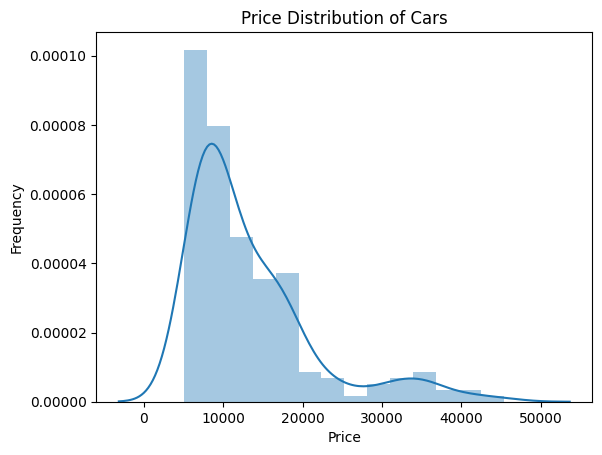

In [40]:
sns.distplot(df['price'],kde=True)
plt.title('Price Distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The price spans from \$ 5,118.00 to \$ 45,400.00, with an average of \$ 13,276.71.

distribution is right-skewed -> log transformation?

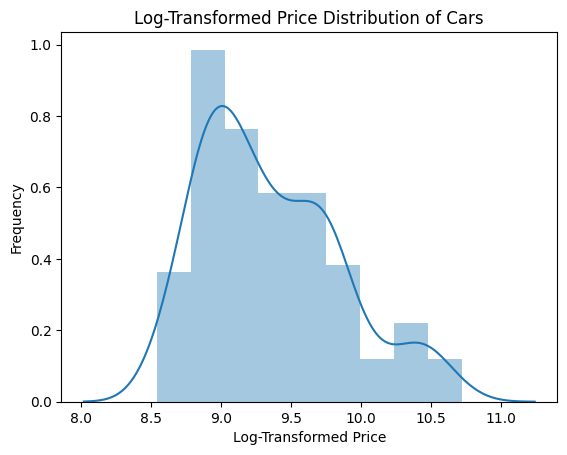

In [41]:
# apply log transformation to the "price"
df['price_log'] = np.log(df['price'] + 1)  # add 1 to avoid log(0) issues

# plot transformed normal distribution
sns.distplot(df['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution of Cars')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

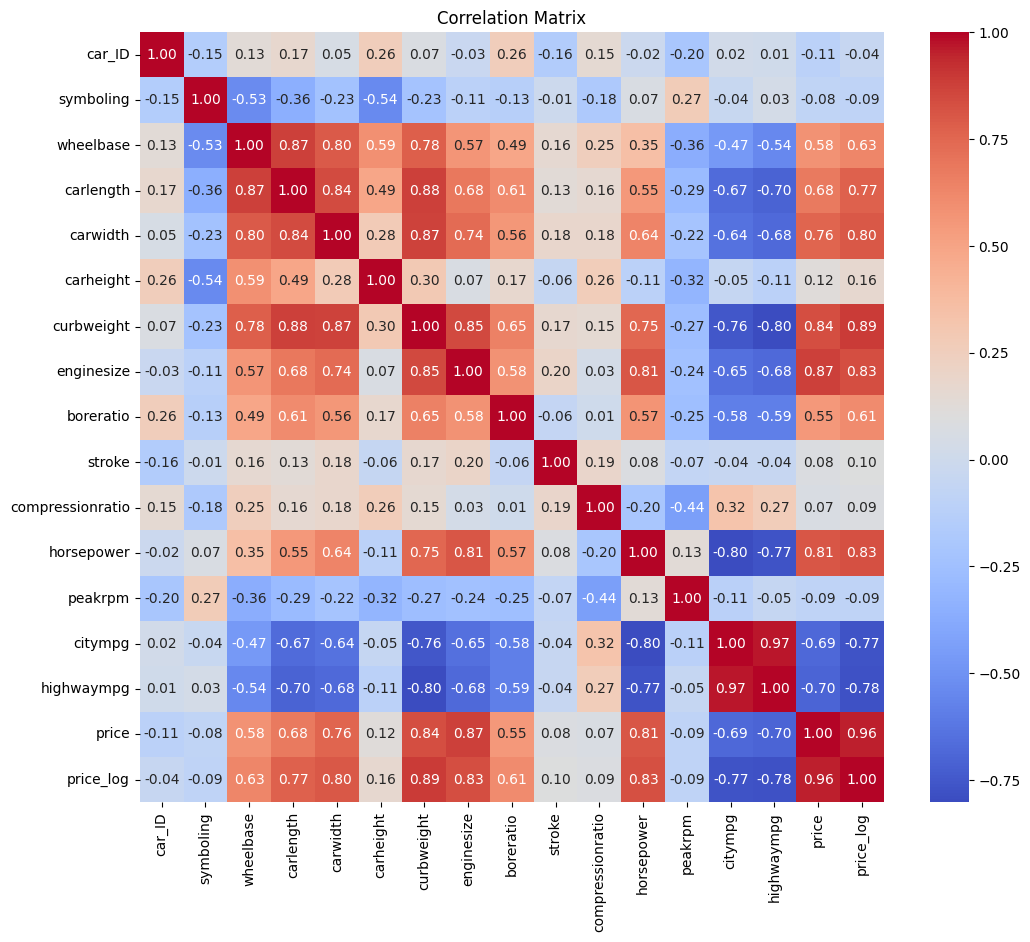

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**High Positive Correlation**

*   Features like `enginesize`, `curbweight`, `horsepower`,`carwidth`, and `carlength` has the strong positive correlations with the car price. In other words, if these factors increase, the price of the car tends to increase as well.

**Negative Correlation**

*  Variables such as `citympg` and `highwaympg` have a negative correlation with price, suggesting that cars with higher fuel efficiency tend to be less expensive.


In [43]:
categorical = ['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

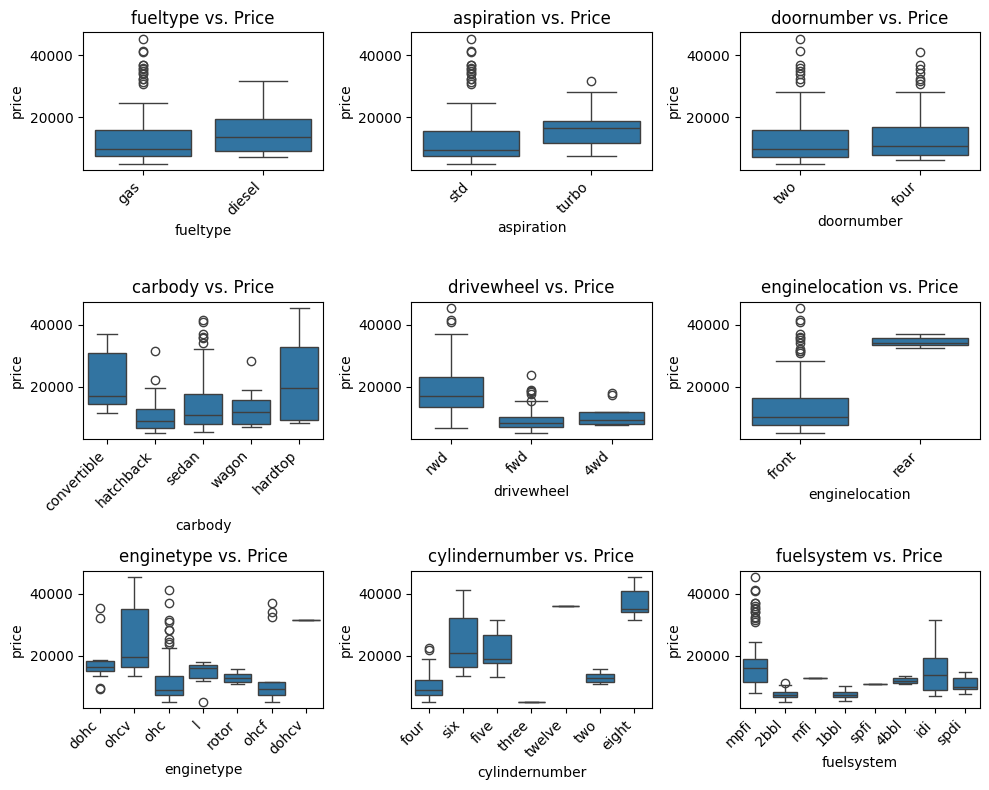

In [44]:
# categorical features vs. price
plt.figure(figsize=(10, 8))
for i, feature in enumerate(categorical):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import scipy.stats as stats

# use 'price_log' for the tests as it is normally distributed
significance_results = {}

# loop through each categorical feature
for feature in categorical:
    # input price_log in the categories for the features
    categories = df[feature].unique()
    groups = [df[df[feature] == category]['price_log'] for category in categories]

    # use t-test for 2 categories, else, use ANOVA
    if len(categories) == 2:
        test_name = "T-test"
        test_stat, p_value = stats.ttest_ind(*groups)
    else:
        test_name = "ANOVA"
        test_stat, p_value = stats.f_oneway(*groups)

    # receive results
    significance_results[feature] = {'Test': test_name, 'P-Value': p_value}

# function for extremely small p-value
def format_p_value(x):
    return f'{x:.1e}' if x < 0.001 else f'{x:.3f}'

# function to assign significance codes
def assign_significance_code(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# display the results
significance_df = pd.DataFrame(significance_results).transpose()
significance_df['Signif. Code'] = significance_df['P-Value'].map(assign_significance_code)
significance_df['P-Value'] = significance_df['P-Value'].map(format_p_value)

# print results
print("Significant Features Impacting Price: \n")
print(significance_df)

Significant Features Impacting Price: 

                  Test  P-Value Signif. Code
fueltype        T-test    0.058             
aspiration      T-test  1.9e-04          ***
doornumber      T-test    0.217             
carbody          ANOVA  1.5e-05          ***
drivewheel       ANOVA  7.4e-29          ***
enginelocation  T-test  1.2e-04          ***
enginetype       ANOVA  1.1e-08          ***
cylindernumber   ANOVA  4.0e-31          ***
fuelsystem       ANOVA  4.5e-28          ***


**Significant Features**

*   Features like `aspiration`, `carbody`, `drivewheel`,`enginelocation`, `enginetype`, `cylindernumber`, and `fuelsystem` has a significant correlations with the normal distributed car price.

We will now use a total of six features to identify the algorithm that most accurately predicts car prices.

- `forward selection`
- `backward selection`
- `lasso`
- `Support Vector Machine`
- `Random Forest`
- `XGBoost`

**Forward Selection**

In [46]:
# define a function that prints the performance metrics and returns them
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
def performance_metrics(y_true, y_pred, model_name):
    mse = round(mean_squared_error(y_true, y_pred),5)
    mae = round(mean_absolute_error(y_true, y_pred),5)
    r2 = round(r2_score(y_true, y_pred),5)

    print(f"\n{model_name} Performance Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

    return {
        'model': model_name,
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

Selected Features after Forward Selection:
['curbweight', 'horsepower', 'carwidth', 'aspiration_turbo', 'carbody_hatchback', 'carbody_wagon', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_l', 'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi']

Forward Selection Performance Metrics:
Mean Squared Error (MSE): 0.03277
Mean Absolute Error (MAE): 0.13225
R-squared (R2): 0.87287


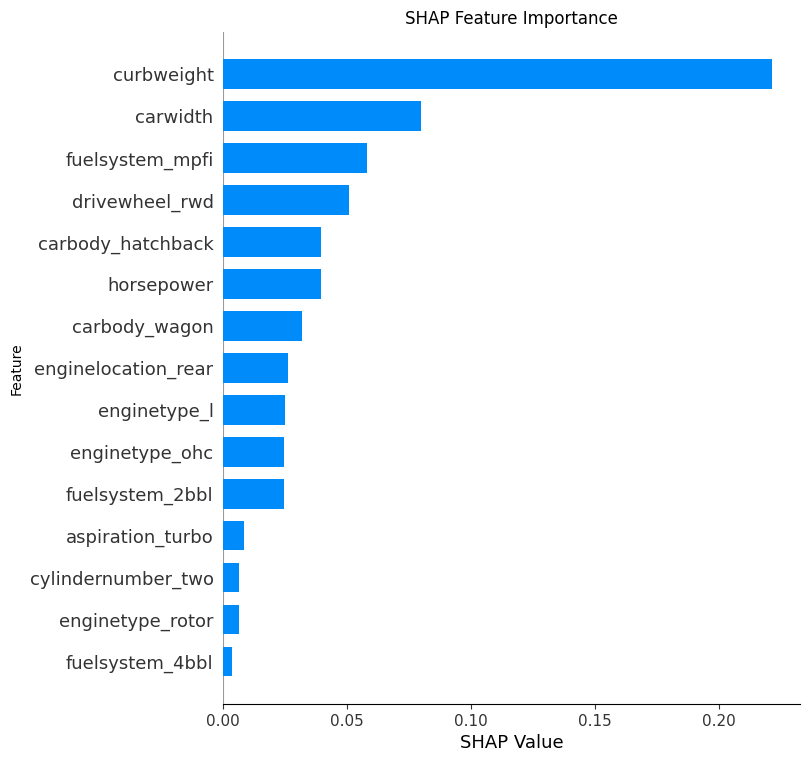

<Figure size 800x500 with 0 Axes>

In [47]:
import warnings
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

# ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# includes significant categorical features
categorical_features = [
    'aspiration', 'carbody', 'drivewheel', 'enginelocation',
    'enginetype', 'cylindernumber', 'fuelsystem'
]
sign_categorical_features = [feature for feature in categorical_features if feature in df.columns]
df = pd.get_dummies(df, columns=sign_categorical_features, drop_first=True)

# define independent and dependent variables
y = pd.to_numeric(df['price_log'], errors='coerce').fillna(0)
x_features = [
    'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength'
] + [col for col in df.columns if col.startswith(tuple(sign_categorical_features))]
X = df[x_features]

# keep feature names in a list
feature_names = X.columns.tolist()

# scale the features (x-values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convert scaled data back to DataFrame to keep feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# list to store model performances
model_performances = []
# declare linear regression model
model = LinearRegression()

# perform forward selection using SequentialFeatureSelector
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

# fit the model to the training data
sfs = sfs.fit(X_train, y_train)

# obtain the selected feature names
selected_feature_names = list(sfs.k_feature_names_)
print("Selected Features after Forward Selection:")
print(selected_feature_names)

# fit final model with selected features
final_model = model.fit(X_train[selected_feature_names], y_train)

# predictions on the test set
y_pred = final_model.predict(X_test[selected_feature_names])
model_performances.append(performance_metrics(y_test, y_pred, "Forward Selection"))

# SHAP feature importance
explainer = shap.Explainer(final_model, X_train[selected_feature_names])
shap_values = explainer(X_test[selected_feature_names])
shap.summary_plot(shap_values, X_test[selected_feature_names], plot_type="bar", show = False)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance")
plt.figure(figsize=(8, 5))
plt.show()

**Backward Selection**

Selected Features after Backward Selection:
['curbweight', 'horsepower', 'carwidth', 'carlength', 'aspiration_turbo', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'enginelocation_rear', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'fuelsystem_2bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi']

Backward Selection Performance Metrics:
Mean Squared Error (MSE): 0.03277
Mean Absolute Error (MAE): 0.13225
R-squared (R2): 0.87287


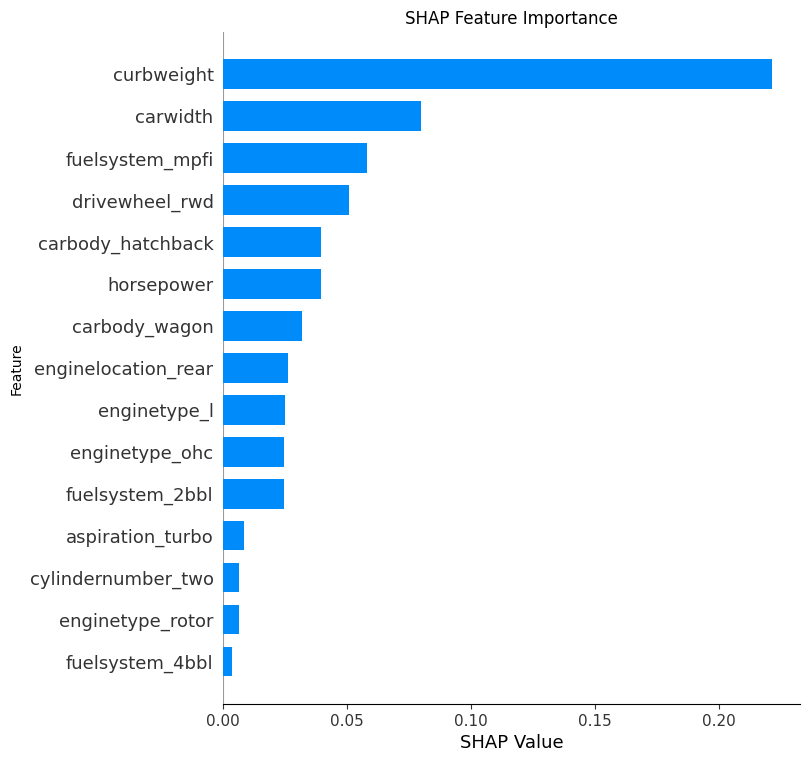

<Figure size 800x500 with 0 Axes>

In [48]:
# declare linear regression model
model = LinearRegression()

# perform backward selection using SequentialFeatureSelector
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='r2',
          cv=5)

# fit the model to the training data
sfs = sfs.fit(X_train, y_train)

# obtain the selected features
best_features = list(sfs.k_feature_names_)
print("Selected Features after Backward Selection:")
print(best_features)

# fit final model with selected features
final_model = model.fit(X_train[selected_feature_names], y_train)

# predictions on the test set
y_pred = final_model.predict(X_test[selected_feature_names])
model_performances.append(performance_metrics(y_test, y_pred, "Backward Selection"))

# SHAP feature importance
plt.figure(figsize=(10, 6))
explainer = shap.Explainer(final_model, X_train[selected_feature_names])
shap_values = explainer(X_test[selected_feature_names])
shap.summary_plot(shap_values, X_test[selected_feature_names], plot_type="bar", show = False)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance")
plt.figure(figsize=(8, 5))
plt.show()

**Lasso**

Selected Features after Lasso Regression:
['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']

Lasso Regression Performance Metrics:
Mean Squared Error (MSE): 0.02546
Mean Absolute Error (MAE): 0.12248
R-squared (R2): 0.90123


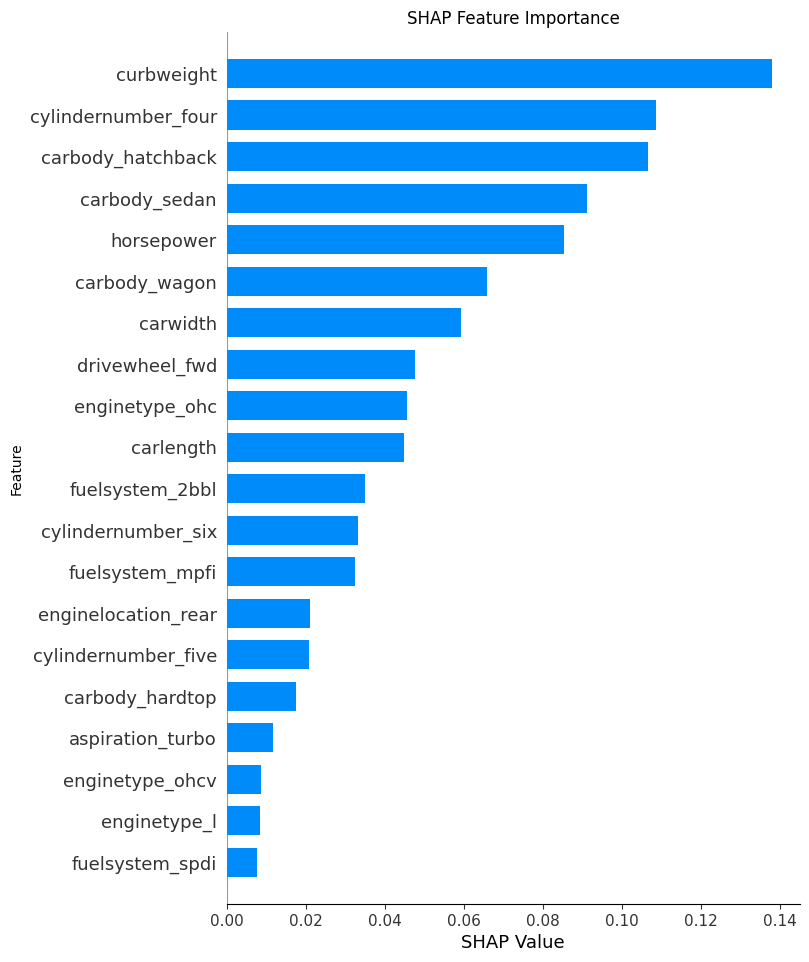

<Figure size 800x500 with 0 Axes>

In [49]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# obtain the features with non-zero coefficients
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
best_features = lasso_coef[lasso_coef != 0].index.tolist()
print("Selected Features after Lasso Regression:")
print(best_features)

# fit final model with selected features from Lasso
final_model = lasso.fit(X_train[best_features], y_train)

# predictions on the test set using Lasso-selected features
y_pred = final_model.predict(X_test[best_features])
model_performances.append(performance_metrics(y_test, y_pred, "Lasso Regression"))

# SHAP feature importance
explainer = shap.Explainer(final_model, X_train[best_features])
shap_values = explainer(X_test[best_features])
shap.summary_plot(shap_values, X_test[best_features], plot_type="bar", show = False)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance")
plt.figure(figsize=(8, 5))
plt.show()

**Support Vector Machine**

Selected Features after SVM Feature Selection:
['curbweight', 'horsepower', 'carwidth', 'carlength', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'enginelocation_rear', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six']

Support Vector Machine Performance Metrics:
Mean Squared Error (MSE): 0.03378
Mean Absolute Error (MAE): 0.1233
R-squared (R2): 0.86895


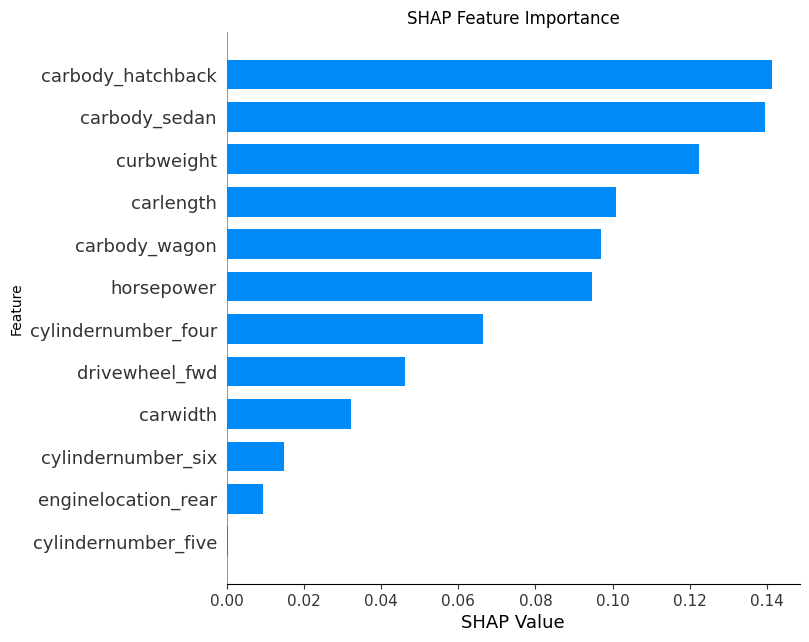

<Figure size 800x500 with 0 Axes>

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel

# ignore UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# declare and train the SVM model for feature selection
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# use SelectFromModel to select important features based on SVM coefficients
selector = SelectFromModel(svm_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# get the selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print("Selected Features after SVM Feature Selection:")
print(selected_features)

# train the final model using the selected features
final_model = SVR(kernel='linear')
final_model.fit(X_train_selected, y_train)

# predictions on the test set
y_pred = final_model.predict(X_test_selected)
model_performances.append(performance_metrics(y_test, y_pred, "Support Vector Machine"))

# SHAP feature importance
explainer = shap.Explainer(final_model, X_train_selected)
shap_values = explainer(X_test_selected)
shap.summary_plot(shap_values, pd.DataFrame(X_test_selected, columns=selected_features), feature_names=selected_features, plot_type="bar", show = False)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance")
plt.figure(figsize=(8, 5))
plt.show()

**Random Forest**

Selected Features after Random Forest Feature Selection:
['enginesize', 'curbweight', 'horsepower']

Random Forest Performance Metrics:
Mean Squared Error (MSE): 0.02317
Mean Absolute Error (MAE): 0.12166
R-squared (R2): 0.91011


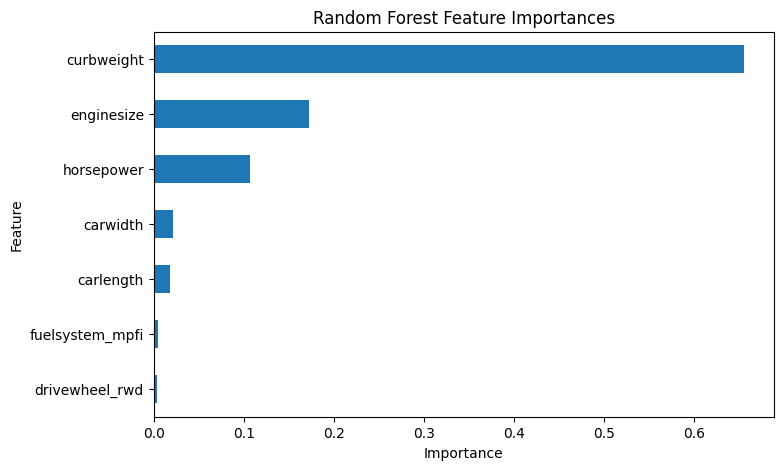

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# declare and train the Random Forest model for feature selection
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# use SelectFromModel to select important features based on Random Forest feature importances
selector = SelectFromModel(rf_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# get the selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print("Selected Features after Random Forest Feature Selection:")
print(selected_features)

# train the final model using the selected features
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train_selected, y_train)

# predictions on the test set
y_pred = final_model.predict(X_test_selected)
model_performances.append(performance_metrics(y_test, y_pred, "Random Forest"))

# Random Forest feature importance plot
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
top_features = forest_importances.sort_values(ascending=False).head(7)
top_features.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Random Forest Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

**XGBoost**

Selected Features after XGBoost Feature Selection:
['enginesize', 'curbweight', 'horsepower', 'drivewheel_rwd', 'enginetype_ohc']

XGBoost Performance Metrics:
Mean Squared Error (MSE): 0.02854
Mean Absolute Error (MAE): 0.12953
R-squared (R2): 0.88928


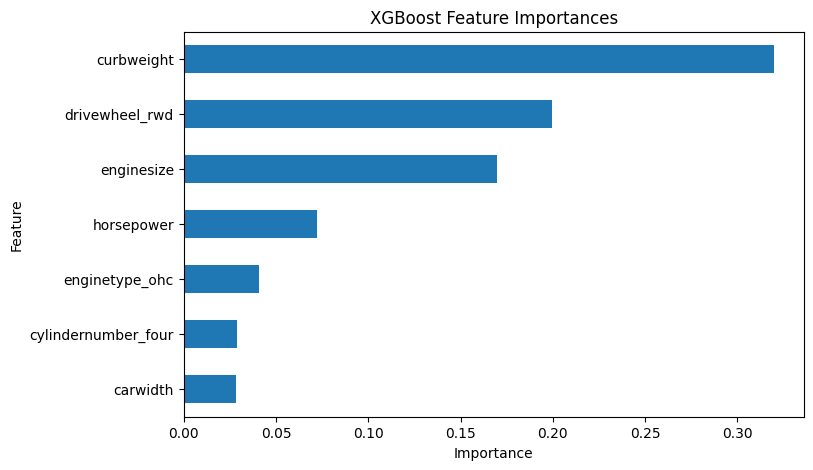

In [52]:
from xgboost import XGBRegressor

# declare and train the XGBoost model for feature selection
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# use SelectFromModel to select important features based on XGBoost feature importances
selector = SelectFromModel(xgb_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# get the selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print("Selected Features after XGBoost Feature Selection:")
print(selected_features)

# train the final model using the selected features
final_model = XGBRegressor(random_state=42, n_estimators=100)
final_model.fit(X_train_selected, y_train)

# predictions on the test set
y_pred = final_model.predict(X_test_selected)
model_performances.append(performance_metrics(y_test, y_pred, "XGBoost"))

# XGBoost feature importance plot
importances = xgb_model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
top_features = forest_importances.sort_values(ascending=False).head(7)
top_features.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("XGBoost Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


In [53]:
# determine the best model based on R-squared value
best_model = max(model_performances, key=lambda x: x['r2'])
print(f"Model: {best_model['model']}, R-squared: {best_model['r2']}, MSE: {best_model['mse']}, MAE: {best_model['mae']}")

# create a DataFrame to display model performances
performance_df = pd.DataFrame(model_performances)
performance_df = performance_df[['model', 'mse', 'mae', 'r2']]
performance_df.columns = ['Model', 'MSE', 'MAE', 'R-squared']

# sort by R-squared value and display
performance_df_sorted = performance_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)
from IPython.display import display

# highlight the most accurate model in red
highlighted_df = performance_df_sorted.style.apply(lambda x: ['color: red; font-weight: bold' if x['Model'] == best_model['model'] else '' for _ in x], axis=1)
display(highlighted_df)

Model: Random Forest, R-squared: 0.91011, MSE: 0.02317, MAE: 0.12166


,Model,MSE,MAE,R-squared
0,Random Forest,0.023170,0.121660,0.910110
1,Lasso Regression,0.025460,0.122480,0.901230
2,XGBoost,0.028540,0.129530,0.889280
3,Forward Selection,0.032770,0.132250,0.872870
4,Backward Selection,0.032770,0.132250,0.872870
5,Support Vector Machine,0.033780,0.123300,0.868950


Based on R-squared value, the best model is resulted to be `Random Forest`. According to the result, from this model, the most significant features to predict the car price are `enginesize`, `curbweight`, and `horsepower`